# Combined Bar Chart - CVCL vs CLIP Across All Discrimination Tests

This notebook creates a horizontal bar chart comparing model performance across SCDC (color), SCDS (size), and SCDT (texture) discrimination tests.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Path setup
RESULTS_DIR = os.path.dirname(os.path.abspath('.'))

# Load all three CSV files
scdc_df = pd.read_csv('scdc_perclass_results.csv')
scds_df = pd.read_csv('scds_perclass_results.csv')
scdt_df = pd.read_csv('scdt_perclass_results.csv')

print("Loaded data:")
print(f"SCDC shape: {scdc_df.shape}")
print(f"SCDS shape: {scds_df.shape}")
print(f"SCDT shape: {scdt_df.shape}")

# Check columns
print("\nColumns in SCDC:")
print(scdc_df.columns.tolist())
print("\nFirst few rows of SCDC:")
print(scdc_df.head())

Loaded data:
SCDC shape: (390, 6)
SCDS shape: (408, 6)
SCDT shape: (408, 6)

Columns in SCDC:
['model', 'class', 'seed', 'accuracy', 'n_trials', 'test_type']

First few rows of SCDC:
          model   class  seed  accuracy  n_trials test_type
0  cvcl-resnext  abacus     0  0.303333       500      SCDC
1  cvcl-resnext  abacus     1  0.290000       500      SCDC
2  cvcl-resnext  abacus     2  0.263333       500      SCDC
3  cvcl-resnext   apple     0  0.303333       500      SCDC
4  cvcl-resnext   apple     1  0.273333       500      SCDC


In [4]:
# Calculate statistics for each test and model
def calculate_stats(df, test_name):
    """Calculate mean and std for each model in a test."""
    stats = {}
    
    for model in df['model'].unique():
        model_data = df[df['model'] == model]['accuracy'].values
        
        # Calculate overall mean and standard error
        mean_acc = np.mean(model_data) * 100  # Convert to percentage
        std_acc = np.std(model_data) * 100
        
        # Standard error for error bars
        n_samples = len(model_data)
        se = std_acc / np.sqrt(n_samples)
        ci95 = 1.96 * se  # 95% confidence interval
        
        stats[model] = {
            'mean': mean_acc,
            'std': std_acc,
            'se': se,
            'ci95': ci95,
            'n': n_samples
        }
    
    return stats

# Calculate stats for each test
scdc_stats = calculate_stats(scdc_df, 'SCDC (Color)')
scds_stats = calculate_stats(scds_df, 'SCDS (Size)')
scdt_stats = calculate_stats(scdt_df, 'SCDT (Texture)')

# Print summary
print("Summary Statistics:\n")
print("SCDC (Color Discrimination):")
for model, stats in scdc_stats.items():
    print(f"  {model}: {stats['mean']:.1f}% ± {stats['ci95']:.1f}%")

print("\nSCDS (Size Discrimination):")
for model, stats in scds_stats.items():
    print(f"  {model}: {stats['mean']:.1f}% ± {stats['ci95']:.1f}%")

print("\nSCDT (Texture Discrimination):")
for model, stats in scdt_stats.items():
    print(f"  {model}: {stats['mean']:.1f}% ± {stats['ci95']:.1f}%")

Summary Statistics:

SCDC (Color Discrimination):
  cvcl-resnext: 24.9% ± 1.5%
  clip-res: 69.2% ± 2.5%

SCDS (Size Discrimination):
  cvcl-resnext: 61.8% ± 2.8%
  clip-res: 50.5% ± 3.1%

SCDT (Texture Discrimination):
  cvcl-resnext: 88.9% ± 2.4%
  clip-res: 89.8% ± 1.9%


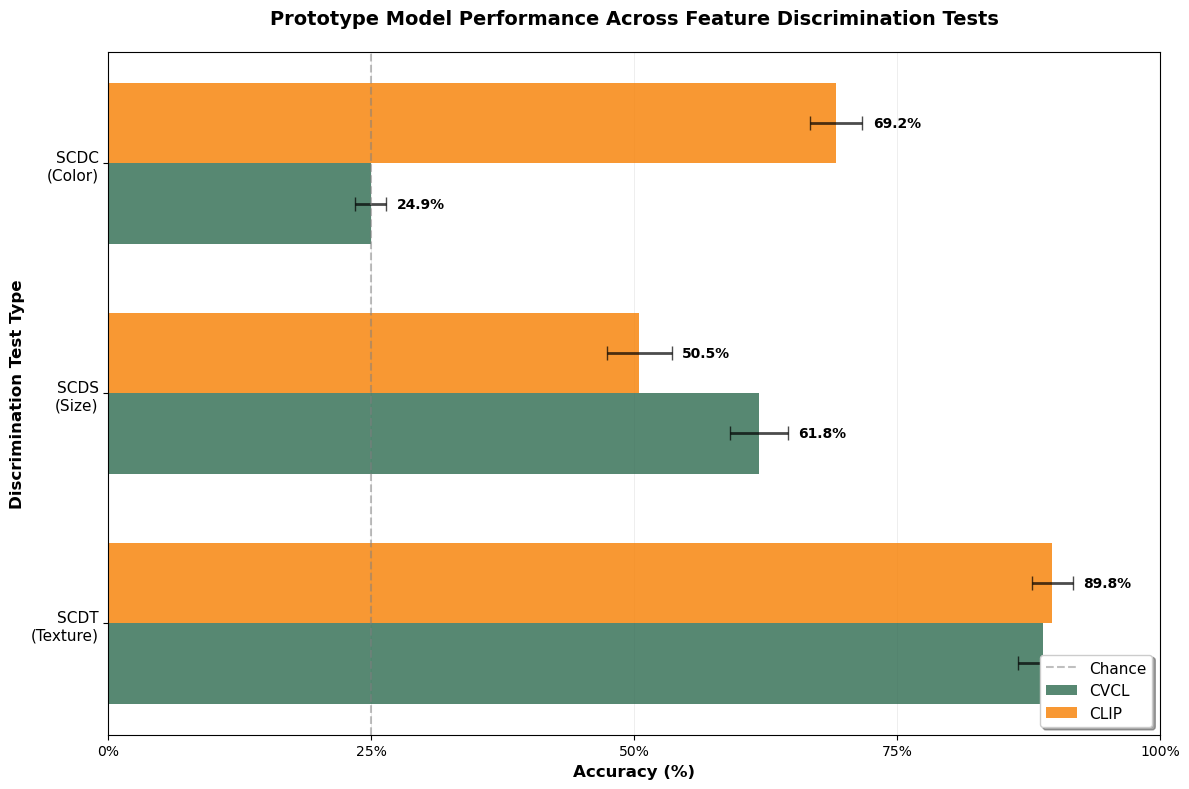


Figure saved as:
  - combined_discrimination_results.png
  - combined_discrimination_results.pdf


In [5]:
# Create horizontal bar chart with error bars
fig, ax = plt.subplots(figsize=(12, 8))

# Setup data for plotting
tests = ['SCDT\n(Texture)', 'SCDS\n(Size)', 'SCDC\n(Color)']  # Reversed for bottom-to-top
test_stats = [scdt_stats, scds_stats, scdc_stats]  # Match order

# Model colors - consistent with your notebooks
colors = {
    'cvcl-resnext': '#2d6a4f',  # Forest green
    'clip-res': '#f77f00'  # Orange
}

# Bar settings
bar_height = 0.35
y_positions = np.arange(len(tests))

# Plot bars for each model
for i, (test_name, stats) in enumerate(zip(tests, test_stats)):
    # CVCL bar
    if 'cvcl-resnext' in stats:
        cvcl_mean = stats['cvcl-resnext']['mean']
        cvcl_error = stats['cvcl-resnext']['ci95']
        ax.barh(y_positions[i] - bar_height/2, cvcl_mean, bar_height,
                xerr=cvcl_error, 
                color=colors['cvcl-resnext'],
                alpha=0.8,
                label='CVCL' if i == 0 else None,
                capsize=5,
                error_kw={'linewidth': 2, 'ecolor': 'black', 'alpha': 0.7})
        
        # Add value label
        ax.text(cvcl_mean + cvcl_error + 1, y_positions[i] - bar_height/2, 
                f'{cvcl_mean:.1f}%', 
                va='center', fontsize=10, fontweight='bold')
    
    # CLIP bar
    if 'clip-res' in stats:
        clip_mean = stats['clip-res']['mean']
        clip_error = stats['clip-res']['ci95']
        ax.barh(y_positions[i] + bar_height/2, clip_mean, bar_height,
                xerr=clip_error,
                color=colors['clip-res'],
                alpha=0.8,
                label='CLIP' if i == 0 else None,
                capsize=5,
                error_kw={'linewidth': 2, 'ecolor': 'black', 'alpha': 0.7})
        
        # Add value label
        ax.text(clip_mean + clip_error + 1, y_positions[i] + bar_height/2, 
                f'{clip_mean:.1f}%', 
                va='center', fontsize=10, fontweight='bold')

# Formatting
ax.set_ylabel('Discrimination Test Type', fontsize=12, fontweight='bold')
ax.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Prototype Model Performance Across Feature Discrimination Tests', 
             fontsize=14, fontweight='bold', pad=20)

# Set y-axis
ax.set_yticks(y_positions)
ax.set_yticklabels(tests, fontsize=11)

# Set x-axis
ax.set_xlim(0, 100)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

# Add chance line
ax.axvline(x=25, color='gray', linestyle='--', alpha=0.5, linewidth=1.5, label='Chance')

# Grid
ax.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Legend
ax.legend(loc='lower right', fontsize=11, frameon=True, fancybox=True, shadow=True)

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('combined_discrimination_results.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('combined_discrimination_results.pdf', bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved as:")
print("  - combined_discrimination_results.png")
print("  - combined_discrimination_results.pdf")

In [ ]:
# Create a summary table
summary_data = []

for test_name, stats in [('SCDC (Color)', scdc_stats), 
                          ('SCDS (Size)', scds_stats), 
                          ('SCDT (Texture)', scdt_stats)]:
    for model, model_stats in stats.items():
        summary_data.append({
            'Test': test_name,
            'Model': model.replace('-resnext', '').replace('-res', '').upper(),
            'Mean Accuracy (%)': f"{model_stats['mean']:.1f}",
            '95% CI': f"±{model_stats['ci95']:.1f}",
            'Std Dev (%)': f"{model_stats['std']:.1f}",
            'N Samples': model_stats['n']
        })

summary_df = pd.DataFrame(summary_data)
print("\nSummary Table:")
print(summary_df.to_string(index=False))

# Save summary table
summary_df.to_csv('discrimination_tests_summary.csv', index=False)
print("\nSummary saved to discrimination_tests_summary.csv")

In [5]:
# Statistical comparison - which model wins each test?
print("\n" + "="*60)
print("STATISTICAL COMPARISON")
print("="*60)

from scipy import stats as scipy_stats

for test_name, df in [('SCDC (Color)', scdc_df), 
                       ('SCDS (Size)', scds_df), 
                       ('SCDT (Texture)', scdt_df)]:
    
    cvcl_data = df[df['model'] == 'cvcl-resnext']['accuracy'].values
    clip_data = df[df['model'] == 'clip-res']['accuracy'].values
    
    # T-test
    t_stat, p_value = scipy_stats.ttest_ind(cvcl_data, clip_data)
    
    cvcl_mean = np.mean(cvcl_data) * 100
    clip_mean = np.mean(clip_data) * 100
    diff = cvcl_mean - clip_mean
    
    print(f"\n{test_name}:")
    print(f"  CVCL: {cvcl_mean:.1f}%")
    print(f"  CLIP: {clip_mean:.1f}%")
    print(f"  Difference: {diff:+.1f}% ({'CVCL' if diff > 0 else 'CLIP'} better)")
    print(f"  p-value: {p_value:.6f}")
    
    if p_value < 0.001:
        print(f"  Result: ***Highly significant (p < 0.001)")
    elif p_value < 0.01:
        print(f"  Result: **Very significant (p < 0.01)")
    elif p_value < 0.05:
        print(f"  Result: *Significant (p < 0.05)")
    else:
        print(f"  Result: Not significant")


STATISTICAL COMPARISON

SCDC (Color):
  CVCL: 24.9%
  CLIP: 69.2%
  Difference: -44.3% (CLIP better)
  p-value: 0.000000
  Result: ***Highly significant (p < 0.001)

SCDS (Size):
  CVCL: 61.8%
  CLIP: 50.5%
  Difference: +11.4% (CVCL better)
  p-value: 0.000000
  Result: ***Highly significant (p < 0.001)

SCDT (Texture):
  CVCL: 88.9%
  CLIP: 89.8%
  Difference: -0.9% (CLIP better)
  p-value: 0.582352
  Result: Not significant
